# Change jupyter config

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from operator import itemgetter
import json
from matplotlib import cm
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd

In [3]:
plot_save_dir = "/home/kaijunge/Documents/PhD/CREATE Lab Git Repo/Raspberry/raspberry-grasping/data/plots_kai"

# Directory handling

In [4]:
datas = []
foler_path =  "cv_alignment/"

for file_path in os.listdir(foler_path):
    f = os.path.join(foler_path, file_path)
    # checking if it is a file
    if os.path.isfile(f):
        with open(f) as json_file:
            datas.append(json.load(json_file))
            

In [5]:
organized_data = {}
for i in range(11):
    organized_data[str(i)] = {"h":[], "v":[]}

for data in datas:    
    for i in range(11):
        organized_data[str(i)]["h"].append(data[str(i)][0])
        organized_data[str(i)]["v"].append(data[str(i)][1])

# Plotting

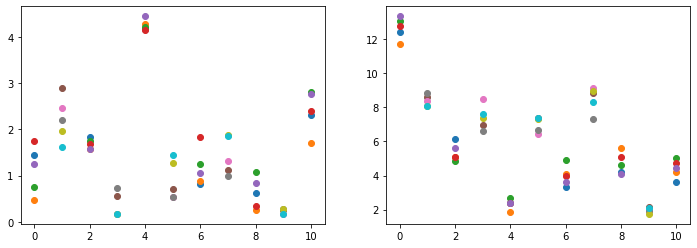

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))

h = []
v = []
for i,ax in enumerate(axs):
    if i == 0:
        category = "h"
    else:
        category = "v"
        
    for j in range(11):
        for datapoint in organized_data[str(j)][category]:
            ax.scatter(j, datapoint)
            if category == "h":
                h.append(datapoint)
            else:
                v.append(datapoint)
                     

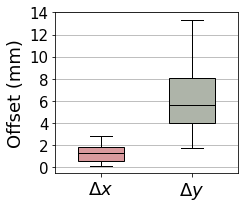

In [7]:
filename = "alignment_offset"

x_pos = [1,2]
mean = [np.mean(h), np.mean(v)]
std = [np.std(h), np.std(v)]

fig, ax = plt.subplots(1, 1, figsize = (3.5, 3))

#ax.bar(x_pos, mean, yerr=std, align='center', alpha=0.5, ecolor='black', capsize=10)

# ax.boxplot([h,v], showfliers=False)

width = 0.5
c = "black"
ax.boxplot(h, positions=[1], notch=False, patch_artist=True, showfliers=False,widths=width,
            boxprops=dict(facecolor="#D89A9E", color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

c = "black"
ax.boxplot(v, positions=[2], notch=False, patch_artist=True,showfliers=False,widths=width,
            boxprops=dict(facecolor="#AEB4A9", color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

ax.set_ylabel('Offset (mm)', fontsize = 18)
ax.set_xticks(x_pos)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(["$\Delta x$", "$\Delta y$"], fontsize = 18)
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
ax.yaxis.grid()

plt.tight_layout()
# plt.savefig(plot_save_dir + '/'+ filename + '.pdf')  
plt.show()

In [12]:
s = []
for x,y in zip(v, h):
    dist = np.sqrt(x**2 + y**2)
    s.append(dist)
    
print("av", np.mean(s))
print("std", np.std(s))

av 6.456036111266561
std 2.8022584109574766


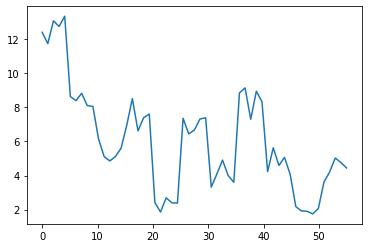

In [11]:

plt.plot(np.linspace(0,55,55), v)